## Initial Setup

In [1]:
# Importing all needed libraries
import numpy
import matplotlib.pyplot as plot 

import pandas  
import seaborn 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load Boston Housing Dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# Get initial output
print("Dataset contents:")
print(boston_dataset.keys())

Dataset contents:
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [2]:
print("Dataset description:")
print(boston_dataset.DESCR)

Dataset description:
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher

In [3]:
# load data into DataFrame object
boston = pandas.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing

In [4]:
# No need to do a Health Check. As per dataset description: 'Missing Attribute Values: None'
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis

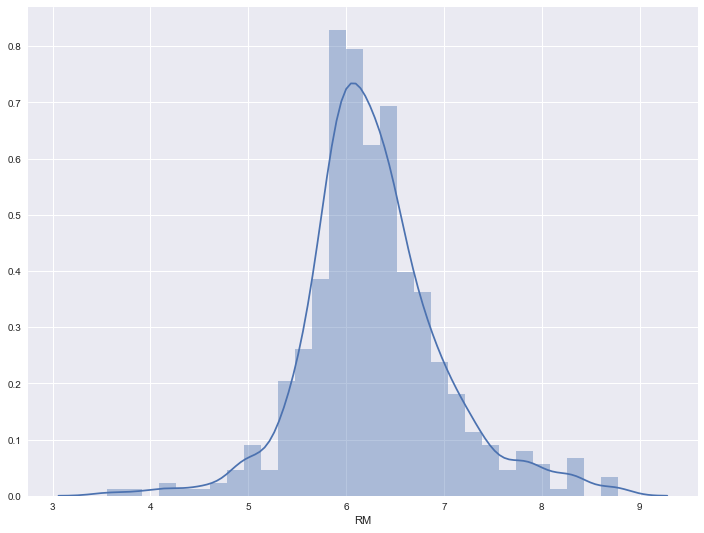

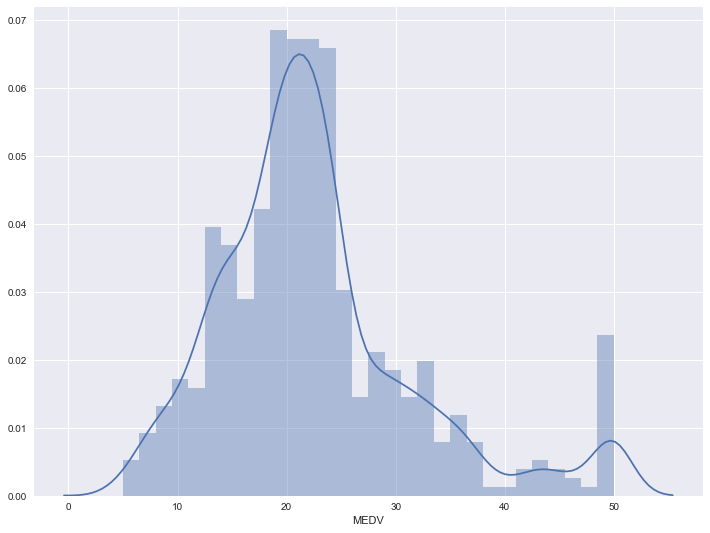

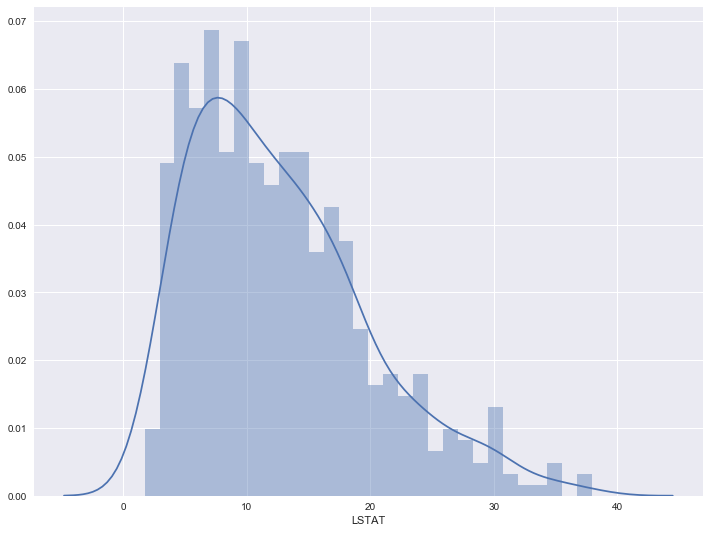

In [5]:
# From brief look on table above, it seems that RM and DIS values are two values that influence MEDV the most.
# Let's check this hypothesis.

seaborn.set(rc={'figure.figsize':(12,9)})
seaborn.distplot(boston['RM'], bins=30)
plot.show()

#seaborn.distplot(boston['DIS'], bins=30)
#plot.show()

seaborn.distplot(boston['MEDV'], bins=30)
plot.show()

# After plotting heatmap, let's build ZN histogram as well 
#seaborn.distplot(boston['ZN'], bins=30)
#plot.show()

seaborn.distplot(boston['LSTAT'], bins=30)
plot.show()

## Data Heatmap

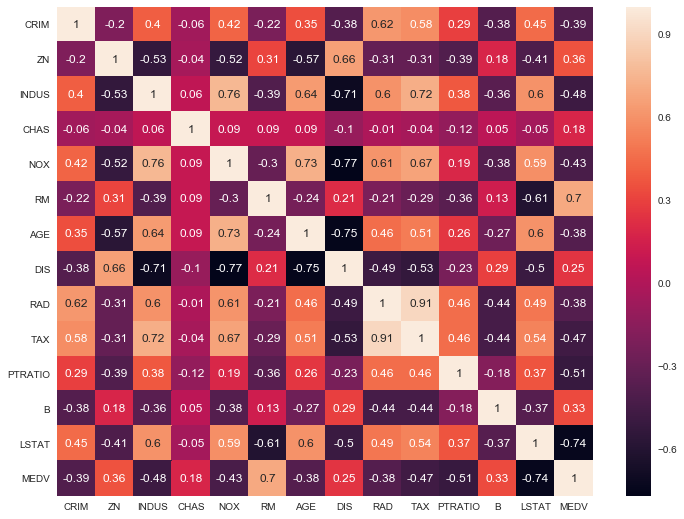

In [6]:
# round(2), function basically rounds all values after comma to two digits
correlation_matrix = boston.corr().round(2)
# 'annot' parameter = True to print the values inside the square, False - otherwise
seaborn.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. 
If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
When it is close to -1, the variables have a strong negative correlation.

Based on above, <b>RM</b> will be used as having good positive correlation and <b>LSTAT</b> due to good negative correlation. 

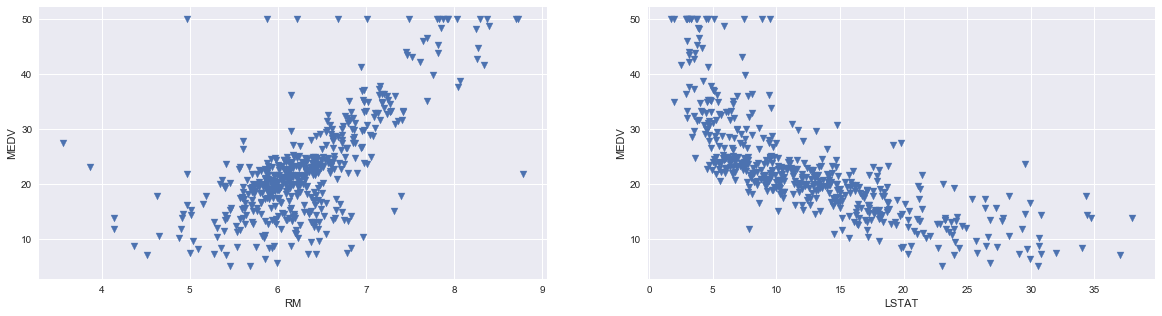

In [7]:
plot.figure(figsize=(20, 5))

features = ['RM', 'LSTAT']
target = boston['MEDV']

for i, col in enumerate(features):
    plot.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plot.scatter(x, y, marker='v')
    plot.xlabel(col)
    plot.ylabel('MEDV')

## Training Process

In [8]:
# Preparations for training

X = pandas.DataFrame(numpy.c_[boston['RM'], boston['LSTAT']], columns = ['RM', 'LSTAT'])
Y = boston['MEDV']

# Split data into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
history = lin_model.fit(X_train, Y_train)

print("Getting coefficients from 'history':")
print(history.coef_, "\n")

# Model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (numpy.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (numpy.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Getting coefficients from 'history':
[ 4.58938833 -0.71722954] 

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186954


More on 'history' can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

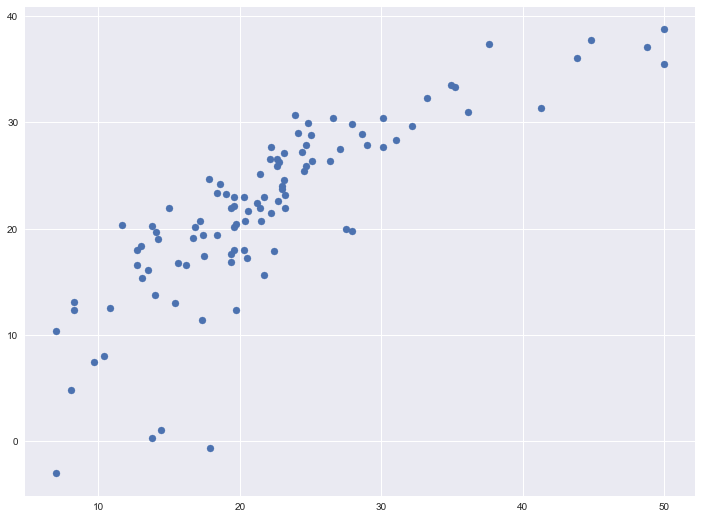

In [9]:
# Ideally should be a straight line
plot.scatter(Y_test, y_test_predict)
plot.show()

## Comparison to UniVariable Linear Regression

| Value | UniVariable LR | MultiVarable LR   |
|-------|----------------|-------------------|
|coefficients |  \[8.82822236\]  | \[ 4.58938833 -0.71722954\]|
|TrS RMSE|6.5068583995673475|5.637129335071195|
|TrS R2|0.4696811450822286|0.6300745149331701|
|TeS RMSE|6.832635897497543|5.137400784702911|
|TeS R2|0.5090306525796445|0.6628996975186954|